# K Nearest Neighbor
| Colin Yee

In [2]:
from cifar10_import import *
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

#### Determining Dimensionality Loss

The biggest hyperparameters that I have to figure out is k and how to do dimensional reductionality the best way

Cross Validation

In [12]:
# Import the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = importCifar10()
assert x_train.shape == (50000, 32, 32, 3) # For slot in the 32 x 32 grid, it's an list of 3 numbers for RGB
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [13]:
scalar = StandardScaler()
x_train_2d = scalar.fit_transform(x_train.flatten().reshape(50000, 3072))
x_test_2d = scalar.transform(x_test.flatten().reshape(10000,3072))

-- Created kNN for k = 1
-- Calculated Accuracy for k = 1
-- Created kNN for k = 2
-- Calculated Accuracy for k = 2
-- Created kNN for k = 5
-- Calculated Accuracy for k = 5
-- Created kNN for k = 10
-- Calculated Accuracy for k = 10


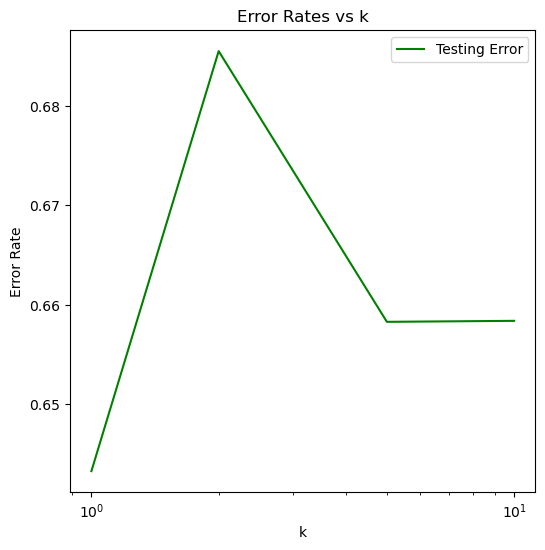

In [14]:
figure, axes = plt.subplots(1, figsize=(6, 6))

k = [1, 2, 5, 10]
valid_error_y =  list()
for i in k:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train_2d,y_train.ravel())
    print(f"-- Created kNN for k = {i}")
    y_pred = neigh.predict(x_test_2d)
    valid_error_y.append(1 - accuracy_score(y_test,y_pred))
    print(f"-- Calculated Accuracy for k = {i}")

axes.semilogx(k,valid_error_y, color = "green", label = "Testing Error")
axes.set_xlabel('k', fontsize=10)
axes.set_ylabel('Error Rate', fontsize=10)
axes.set_title("Error Rates vs k")
axes.legend()